<a href="https://colab.research.google.com/github/pal-ette/iNotePal/blob/6-%EA%B0%90%EC%84%B1-%EB%8C%80%ED%99%94/%EA%B0%90%EC%84%B1%EB%8C%80%ED%99%94%EB%A7%90%EB%AD%89%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

나눔고딕 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,150 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [2]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [4]:
!curl -o "aihubshell" https://api.aihub.or.kr/api/aihubshell.do

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6634  100  6634    0     0   6703      0 --:--:-- --:--:-- --:--:--  6701


In [5]:
!chmod +x aihubshell
!sudo cp aihubshell /usr/bin/
!cd /usr/bin/

In [6]:
!ls -al | grep aihubshell

-rwxr-xr-x 1 root root 6634 Apr 15 06:58 aihubshell


In [7]:
!aihubshell -mode l | grep 감성

86, 감성 대화 말뭉치
466, 감성 및 발화 스타일별 음성합성 데이터
71349, 감성 및 발화스타일 동시 고려 음성합성 데이터
71518, 서울 지역 중학생들의 국어, 수학 교과용 감성 AI 튜터 데이터


In [8]:
os.makedirs('sentiment_corpus')
os.chdir('sentiment_corpus')
print(os.getcwd())

/content/sentiment_corpus


In [9]:

os.environ['AIHUB_ID'] = ''
os.environ['AIHUB_PW'] = ''

In [10]:
!aihubshell -mode d -datasetkey 86

aihubshell version 24.01.29 v0.3
Authentication successful.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20.3M    0 20.3M    0     0  6045k      0 --:--:--  0:00:03 --:--:-- 11.1M
Request successful with HTTP status 200.
Download successful.
018.감성대화/Validation_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Validation.zip.part0
018.감성대화/Validation_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Validation.zip.part0
018.감성대화/Training_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Training.zip.part0
018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.zip.part0
잠시 기다려 주세요 병합중 입니다. 
Merging 감성대화말뭉치(최종데이터)_Training.zip in ./018.감성대화/Training_221115_add/라벨링데이터
Merging 감성대화말뭉치(최종데이터)_Training.zip in ./018.감성대화/Training_221115_add/원천데이터
Merging 감성대화말뭉치(최종데이터)_Validation.zip in ./018.감성대화/Validation_221115_add/라벨링데이터
Merging 감성대화말뭉치(최종데이터

In [11]:
os.chdir('..')
os.makedirs('data6')
os.chdir('data6')
print(os.getcwd())

/content/data6


In [12]:
!unzip -qq "/content/sentiment_corpus/018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.zip"
!unzip -qq "/content/sentiment_corpus/018.감성대화/Validation_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Validation.zip"

In [13]:
df_train = pd.read_excel('/content/data6/감성대화말뭉치(최종데이터)_Training.xlsx', index_col=0)
df_valid = pd.read_excel('/content/data6/감성대화말뭉치(최종데이터)_Validation.xlsx', index_col=0)
print("TRAIN", len(df_train), ", VALID", len(df_valid))

TRAIN 51630 , VALID 6641


In [14]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [15]:
df['연령'].value_counts()

연령
노년     16640
청년     16405
중년     13207
청소년    12019
Name: count, dtype: int64

In [16]:
df['성별'].value_counts().keys()

Index(['여성', '남성'], dtype='object', name='성별')

In [17]:
df['신체질환'].unique()

array(['해당없음', '만성질환 유', '만성질환 무'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(

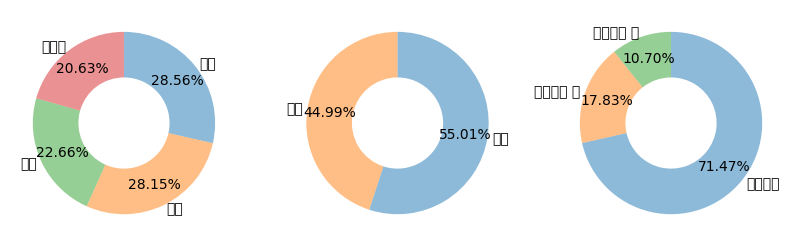

In [18]:
plt.rc('font', family='NanumBarunGothic')

columns = ['연령', '성별', '신체질환']

plt.figure(figsize=(10, 30))

for i, c in enumerate(columns):
  values = df[c].value_counts()
  ax = plt.subplot(1, 3, i+1)
  plt.pie(values, startangle=90, counterclock=False, textprops={'fontsize': 10},
          autopct=lambda p : '{:.2f}%'.format(p), wedgeprops={"alpha": 0.5, "width":0.5}, pctdistance=0.75,
          labels=values.keys(), labeldistance=1.05)

In [19]:
df['감정_대분류'].unique()

array(['분노', '기쁨', '불안', '당황', '슬픔', '상처'], dtype=object)

In [20]:
df['감정_소분류'].unique()

array(['노여워하는', '느긋', '걱정스러운', '당혹스러운', '당황', '마비된', '만족스러운', '배신당한',
       '버려진', '부끄러운', '분노', '불안', '비통한', '상처', '성가신', '스트레스 받는', '슬픔',
       '신뢰하는', '신이 난', '실망한', '악의적인', '안달하는', '안도', '억울한', '열등감', '염세적인',
       '외로운', '우울한', '고립된', '좌절한', '후회되는', '혐오스러운', '한심한', '자신하는', '기쁨',
       '툴툴대는', '남의 시선을 의식하는', '회의적인', '죄책감의', '혼란스러운', '초조한', '흥분',
       '충격 받은', '취약한', '편안한', '방어적인', '질투하는', '두려운', '눈물이 나는', '짜증내는',
       '조심스러운', '낙담한', '환멸을 느끼는', '희생된', '감사하는', '구역질 나는', '괴로워하는',
       '가난한, 불우한'], dtype=object)

In [21]:
cnt = len(df['감정_소분류'].unique())
emotion_list = list(df['감정_소분류'].unique())
print(f'{cnt} 감정 \n항목 : {emotion_list}')

58 감정 
항목 : ['노여워하는', '느긋', '걱정스러운', '당혹스러운', '당황', '마비된', '만족스러운', '배신당한', '버려진', '부끄러운', '분노', '불안', '비통한', '상처', '성가신', '스트레스 받는', '슬픔', '신뢰하는', '신이 난', '실망한', '악의적인', '안달하는', '안도', '억울한', '열등감', '염세적인', '외로운', '우울한', '고립된', '좌절한', '후회되는', '혐오스러운', '한심한', '자신하는', '기쁨', '툴툴대는', '남의 시선을 의식하는', '회의적인', '죄책감의', '혼란스러운', '초조한', '흥분', '충격 받은', '취약한', '편안한', '방어적인', '질투하는', '두려운', '눈물이 나는', '짜증내는', '조심스러운', '낙담한', '환멸을 느끼는', '희생된', '감사하는', '구역질 나는', '괴로워하는', '가난한, 불우한']


In [22]:
emotion_count = df.groupby(['감정_대분류', '감정_소분류'])['성별'].count()

In [23]:
first_emotions = np.sort(df['감정_대분류'].unique())
base_colors = ['lightcoral', 'orange', 'gold', 'forestgreen', 'cornflowerblue', 'rebeccapurple']
cmap = {}

for i in range(len(first_emotions)):
  cmap[first_emotions[i]] = base_colors[i]

cmap

{'기쁨': 'lightcoral',
 '당황': 'orange',
 '분노': 'gold',
 '불안': 'forestgreen',
 '상처': 'cornflowerblue',
 '슬픔': 'rebeccapurple'}

In [24]:
base_colors = ['lightcoral', 'orange', 'gold', 'forestgreen', 'cornflowerblue', 'rebeccapurple']

cnt_dict = {"first":[], "second":[], "cnt":[], "color":[]}

for k, v in emotion_count.items():
  cnt_dict['first'].append(k[0])
  if k[1] in cnt_dict['second']:
    print(k[1])
    cnt_dict['second'].append('*'+k[1])
  else:
    cnt_dict['second'].append(k[1])
  cnt_dict['cnt'].append(v)
  cnt_dict['color'].append(cmap[k[0]])

혼란스러운
고립된


In [25]:
df_cnt = pd.DataFrame(cnt_dict)
df_cnt.head()

,first,second,cnt,color
0,기쁨,감사하는,761,lightcoral
1,기쁨,기쁨,763,lightcoral
2,기쁨,느긋,670,lightcoral
3,기쁨,만족스러운,779,lightcoral
4,기쁨,신뢰하는,765,lightcoral


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

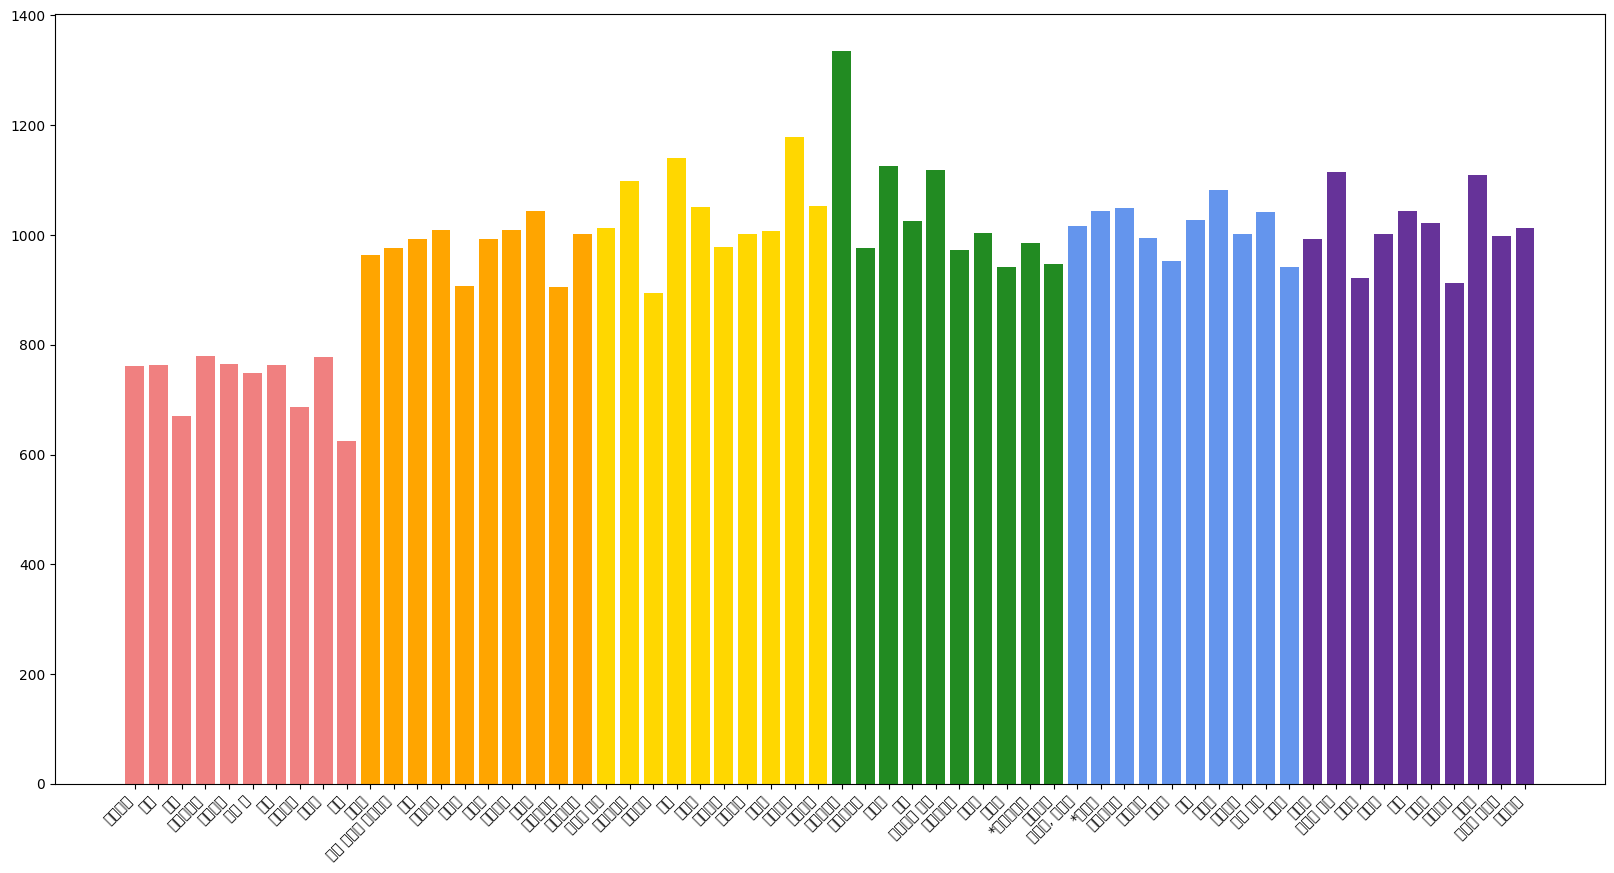

In [26]:
plt.figure(figsize=(20, 10))
plt.bar(df_cnt['second'], df_cnt['cnt'], color=df_cnt['color'])
plt.xticks(rotation=45, ha='right')
# plt.legend(cmap)

plt.show()

# Data Preprocessing

In [27]:
df.head(20)

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.,진로에 대해서 고민하고 계시는군요. 어떤 점이 고민인가요?,직장 상사한테 자주 지적을 받아. 그럴 때마다 이 업무는 나랑 맞지 않는 거 같이 ...,업무가 나와 맞지 않아 시간을 버리는 것 같이 느껴지셨군요.,NaN,NaN
6,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.,부모님의 노여움에 섭섭하시군요. 이런 상황을 어떻게 해결하면 좋을까요?,부모님께 좀 더 시간을 달라고 해야겠어. 진로 테스트를 받아볼까 생각 중이야.,진로 테스트를 받아보겠다고 부모님께 말씀드릴 생각이군요.,NaN,NaN
7,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,천천히라도 직장을 구해 보려고 하시는군요. 특별한 이유가 있으신가요?,더 좋은 회사가 기다리고 있을지도 모르는데 쉬고 있기가 좀 그래.,좋은 일자리를 놓치고 싶지 않아 끊임없이 노력하시는군요. 하는 일이 잘 풀리시길 바라요.,NaN,NaN
8,청년,여성,"진로,취업,직장",해당없음,불안,걱정스러운,졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.,취업에 대해 걱정이 되는군요.,응. 느긋함을 느끼는 내가 좀 싫었는데 걱정을 많이 하는 것보다는 낫다는 생각도 들어.,걱정보다는 느긋한 태도가 낫다고 생각하시는군요.,NaN,NaN
9,청년,여성,"진로,취업,직장",해당없음,기쁨,느긋,요즘 직장생활이 너무 편하고 좋은 것 같아!,직장생활이 편하고 좋으시다니 좋아 보여요. 다니고 계신 회사만의 장점이 있나요?,우리 회사는 복지가 정말 좋아! 내가 곧 출산하게 되는데 육아휴직 기간도 긴 데다가...,예비 엄마들에게는 정말 꿈의 회사인 것 같네요. 마음이 편하시겠어요.,NaN,NaN


In [28]:
df.isna().sum()

연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템문장1        0
사람문장2         0
시스템문장2        0
사람문장3     10890
시스템문장3    10890
dtype: int64

In [29]:
newdf = df.drop(['사람문장3', '시스템문장3','연령', '성별', '상황키워드', '신체질환', '감정_소분류', '시스템문장1', '시스템문장2'], axis=1)
newdf

,감정_대분류,사람문장1,사람문장2
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!
...,...,...,...
58266,당황,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,우리만 뒤처지는 것 같고. 그래도 열심히 살다 보면 우리도 집을 살 수 있겠지?
58267,당황,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,나도 결혼했지만 아이도 생기지 않고 그 정도로 행복하지 않거든. 친구보다 못사는 것...
58268,당황,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,요새 집값이 너무 올라서 한숨만 나와.
58269,당황,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,맞아. 그 친구와 비교하게 되니 자존감이 낮아지는 기분이야.


In [30]:
newdf['감정_대분류'].value_counts()

감정_대분류
불안    10433
분노    10417
상처    10150
슬픔    10128
당황     9804
기쁨     7339
Name: count, dtype: int64

In [31]:
# newdf['감정_소분류'].value_counts()

### 감성대화말뭉치
`'분노', '기쁨', '불안', '당황', '슬픔', '상처'`

### 단발성대화데이터셋
`'공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'`

구두점 제거

## 모델 제작
### 모델 불러오기





In [32]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
from tqdm import tqdm   # 반복문의 진행 상태를 표시하는 라이브러리

# 파이토치 관련 라이브러리 불러오기
import torch
import torch.nn.functional as F # 파이토치 함수: 다양한 활성화 함수 및 유틸리티 제공
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler  # 데이터 관련 유틸리티

# huggingface/transformers에서 T5 모듈 불러오기
from transformers import T5Tokenizer, T5ForConditionalGeneration    # T5 토크나이저와 조건부 생성 모델

In [33]:
!pip install nltk

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 하드웨어 설정

In [35]:
# GPU 사용 설정
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'   # cuda(GPU)가 사용 가능하면 'cuda'를, 아니면 'cpu'를 device 변수에 할당
device

'cuda'

### 하이퍼 파라미터 설정

In [36]:
TRAIN_BATCH_SIZE = 2 # 학습 데이터 배치 크기
VALID_BATCH_SIZE = 2 # 검증 데이터 배치 크기
TRAIN_EPOCHS = 3 # 학습 횟수
VAL_EPOCHS = 1 # 검증 횟수
LEARNING_RATE = 1e-4

MAX_LEN = 512 # 입력 텍스트의 최대 길이
SUMMARY_LEN = 128 # 요약 텍스트의 최대 길이

### 시드 설정
* 모델 초기화, 데이터 셔플링, 드롭아웃 등의 무작위 연산에서 동일한 결과를 얻기 위해 설정한다

In [37]:
# 재현성을 위한 설정
SEED = 42               # 난수 시드 값 설정 (기본값: 42)

torch.manual_seed(SEED) # 파이토치의 난수 시드 값 설정
np.random.seed(SEED)    # 넘파이의 난수 시드 값 설정

## 데이터 분할



In [40]:
# 학습 데이터의 크기 설정 (전체 데이터의 80%)
train_size = 0.8

# 전체 데이터에서 학습 데이터를 무작위로 선택
train_data = newdf.sample(frac=train_size,
                          random_state=SEED).reset_index(drop=True)

In [41]:
train_data.head()

,감정_대분류,사람문장1,사람문장2
0,분노,내가 주말에 얼마나 공부를 했는지 물어보는 친구에게 궁금해 하지 말라고 말해줬어.,나도 몰라. 근데 내 공부시간을 자기 공부시간하고 비교하는 것 같아서 화가 나더라고.
1,슬픔,바람이 살살 부는 게 가을이 온 거 같은 느낌이 드네.,아침에 출근하면서 바람이 살랑거리는 냄새를 맡으니까 마음이 싱숭생숭해지면서 눈물이 ...
2,기쁨,안 팔리던 땅이 괜찮은 가격에 잘 팔렸어.,이 돈은 함부로 안 쓰고 잘 모아뒀다 노후자금으로 쓸 거야. 노후 걱정은 이제 끝이야.
3,불안,임신 중 스트레스 때문인지 출산 후 탈모가 생긴 거 같아 .,탈모가 너무 신경 쓰이고 스트레스도 더 받아.
4,당황,엄마와 대화 중에 엄마는 유산을 한 번 하셨대.,늦둥이라 많이 생각하고 결정하셨는데 힘들게 많이 걸어 다니셔서 유산이 되셨다고 죄책...


In [44]:
# 학습 데이터셋에 포함되지 않은 나머지 데이터를 검증 데이터셋으로 설정
val_data = newdf.drop(train_data.index).reset_index(drop=True)

In [45]:
val_data.head()

,감정_대분류,사람문장1,사람문장2
0,당황,내가 뭐든 될 줄 알고 공부를 안 했는데 현실은 그렇지 않아서 지금 뭐해야 할지 모...,이런 내가 너무 싫고 공부를 안 했던 게 후회가 돼.
1,분노,나는 공부도 못하고 잘하는 게 없어서 뭘 해야 할지 모르겠어.,나는 내가 무엇을 잘하고 무엇을 좋아하는지 모르겠어.
2,불안,나는 돈을 많이 벌고 싶은데 무엇을 해야 되는지 모르겠어.,마음은 해야 된다고 생각하는데 몸이 따라주지 않아. 어떻게 해야 할지 모르겠어.
3,불안,우리 과 일 등을 이기려고 공부를 너무하다가 탈모가 생겼어.,탈모를 치료하려면 병원에 가야 되는데 병원에 가면 공부에 집중하지 못해서 어떻게 해...
4,불안,가장인 내가 돈을 못 벌어 오는 게 가족들에게 창피하고 스트레스받아.,내 우유부단한 성격 때문에 거래처 사장님들을 다 놓쳤어.


In [46]:
print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(val_data.shape))

FULL Dataset: (58271, 12)
TRAIN Dataset: (46617, 3)
TEST Dataset: (11654, 3)


## 토큰화

In [48]:
# T5 토크나이저를 t5-base 모델을 기반으로 불러오기
tokenizer = T5Tokenizer.from_pretrained("t5-base")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [49]:
# 사용자 정의 데이터셋 클래스
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, source_len, summ_len,
                 source_col, highlight_col):
        # 초기화 메서드
        self.tokenizer = tokenizer  # 토크나이저 설정
        self.data = dataframe  # 데이터프레임 설정
        self.source_len = source_len  # 원문의 최대 길이 설정
        self.summ_len = summ_len  # 요약문의 최대 길이 설정
        self.highlight = self.data[highlight_col]  # 요약문 데이터 설정
        self.source = self.data[source_col]  # 원문 데이터 설정

    def __len__(self):
        # 데이터셋의 길이 반환
        return len(self.highlight)

    def __getitem__(self, index):
        # 주어진 인덱스에 해당하는 데이터 반환
        source_text = str(self.source[index])  # 원문 텍스트 추출
        source_text = ' '.join(source_text.split())  # 불필요한 공백 제거

        highlight_text = str(self.highlight[index])  # 요약문 텍스트 추출
        highlight_text = ' '.join(highlight_text.split())  # 불필요한 공백 제거

        # 원문 텍스트를 토큰화
        source_encoded = self.tokenizer.batch_encode_plus(
            [source_text],
            max_length=self.source_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        # 요약문 텍스트를 토큰화
        target_encoded = self.tokenizer.batch_encode_plus(
            [highlight_text],
            max_length=self.summ_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # 토큰화된 결과에서 필요한 정보 추출
        source_ids = source_encoded['input_ids'].squeeze()  # squeeze 메서드는 텐서에서 크기가 1인 차원을 제거
        source_mask = source_encoded['attention_mask'].squeeze()
        target_ids = target_encoded['input_ids'].squeeze()
        target_mask = target_encoded['attention_mask'].squeeze()

        # 결과 반환
        return {
            'source_ids': source_ids.to(dtype=torch.long),
            'source_mask': source_mask.to(dtype=torch.long),
            'target_ids': target_ids.to(dtype=torch.long),
            'target_ids_y': target_ids.to(dtype=torch.long)
        }